

---

# Améliorée

---



In [ ]:
# Fonction pour traiter et afficher chaque image
def process_and_display(image_path):
    # Charger l'image en RGB et la convertir en niveaux de gris
    image_rgb = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # Appliquer un seuillage pour obtenir une image binaire
    _, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


    if image_path == 'melanome.jpg':
      # Inverser l'image pour avoir les cellules en blanc et le fond en noir
      image_inverted = cv2.bitwise_not(image_binary)

      # Appliquer les transformées de distance Euclidienne et Manhattan
      distance_euclidean = cv2.distanceTransform(image_inverted, cv2.DIST_L2, 5)
      distance_cityblock = cv2.distanceTransform(image_inverted, cv2.DIST_L1, 5)

      # Visualisation des étapes
      plt.figure(figsize=(15, 8))

      # Affichage des différentes étapes
      plt.subplot(2, 3, 1)
      plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
      plt.title(f"Image originale - {image_path}")

      plt.subplot(2, 3, 2)
      plt.imshow(image_gray, cmap='gray')
      plt.title("Image en niveaux de gris")

      plt.subplot(2, 3, 3)
      plt.imshow(image_inverted, cmap='gray')
      plt.title("Image binaire inversée")

      # Affichage de la transformée Euclidienne
      plt.subplot(2, 3, 4)
      plt.imshow(distance_euclidean, cmap='gray')
      plt.title("Transformée de distance Euclidienne")
      plt.colorbar()

      # Affichage de la transformée de distance Manhattan
      plt.subplot(2, 3, 5)
      plt.imshow(distance_cityblock, cmap='gray')
      plt.title("Transformée de distance Manhattan")
      plt.colorbar()

      plt.tight_layout()
      plt.show()

    else:

      # Appliquer les transformées de distance Euclidienne et Manhattan
      distance_euclidean = cv2.distanceTransform(image_binary, cv2.DIST_L2, 5)
      distance_cityblock = cv2.distanceTransform(image_binary, cv2.DIST_L1, 5)

      # Visualisation des étapes
      plt.figure(figsize=(15, 8))

      # Affichage des différentes étapes
      plt.subplot(2, 3, 1)
      plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
      plt.title(f"Image originale - {image_path}")

      plt.subplot(2, 3, 2)
      plt.imshow(image_gray, cmap='gray')
      plt.title("Image en niveaux de gris")

      plt.subplot(2, 3, 3)
      plt.imshow(image_binary, cmap='gray')
      plt.title("Image binaire inversée")

      # Affichage de la transformée Euclidienne
      plt.subplot(2, 3, 4)
      plt.imshow(distance_euclidean, cmap='gray')
      plt.title("Transformée de distance Euclidienne")
      plt.colorbar()

      # Affichage de la transformée de distance Manhattan
      plt.subplot(2, 3, 5)
      plt.imshow(distance_cityblock, cmap='gray')
      plt.title("Transformée de distance Manhattan")
      plt.colorbar()

      plt.tight_layout()
      plt.show()

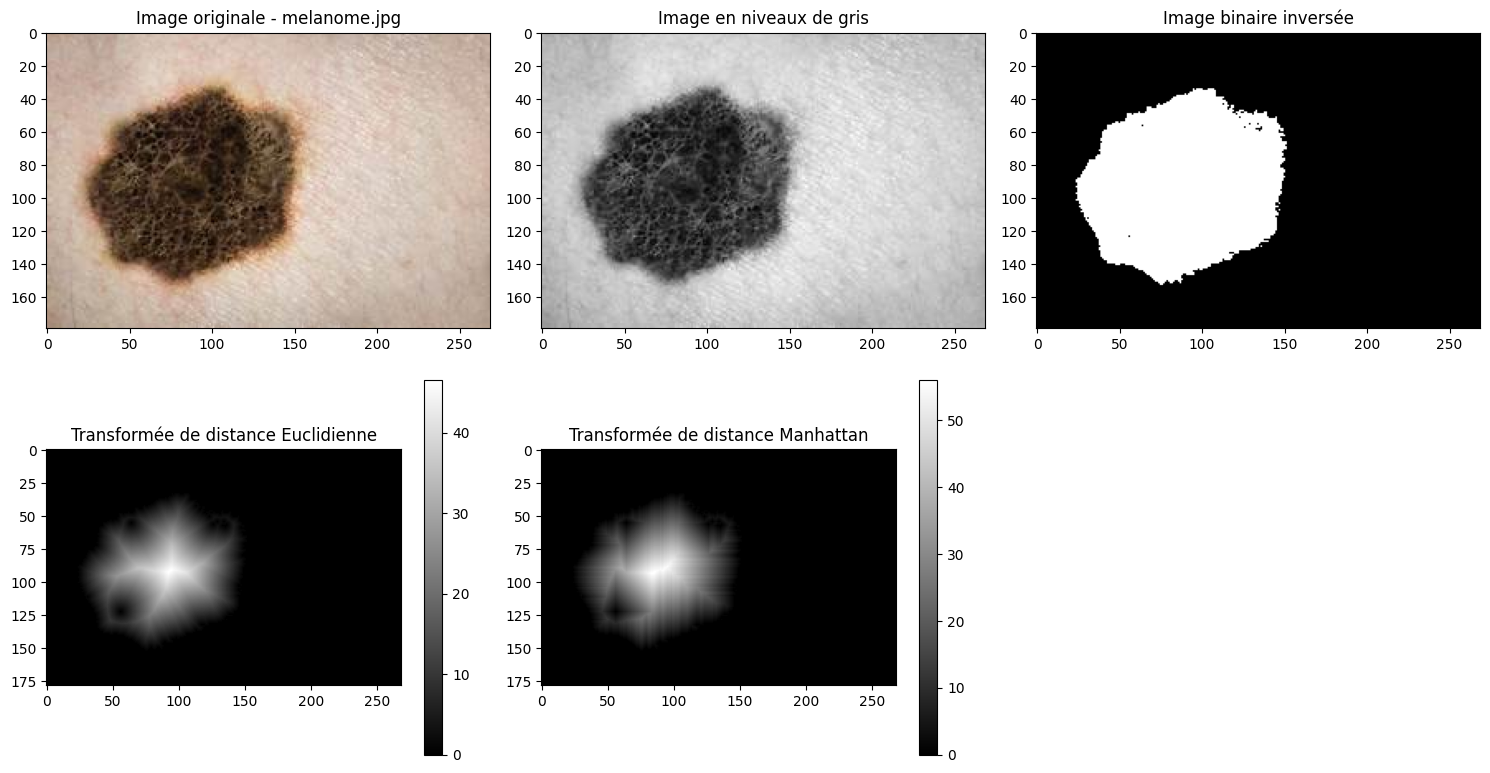

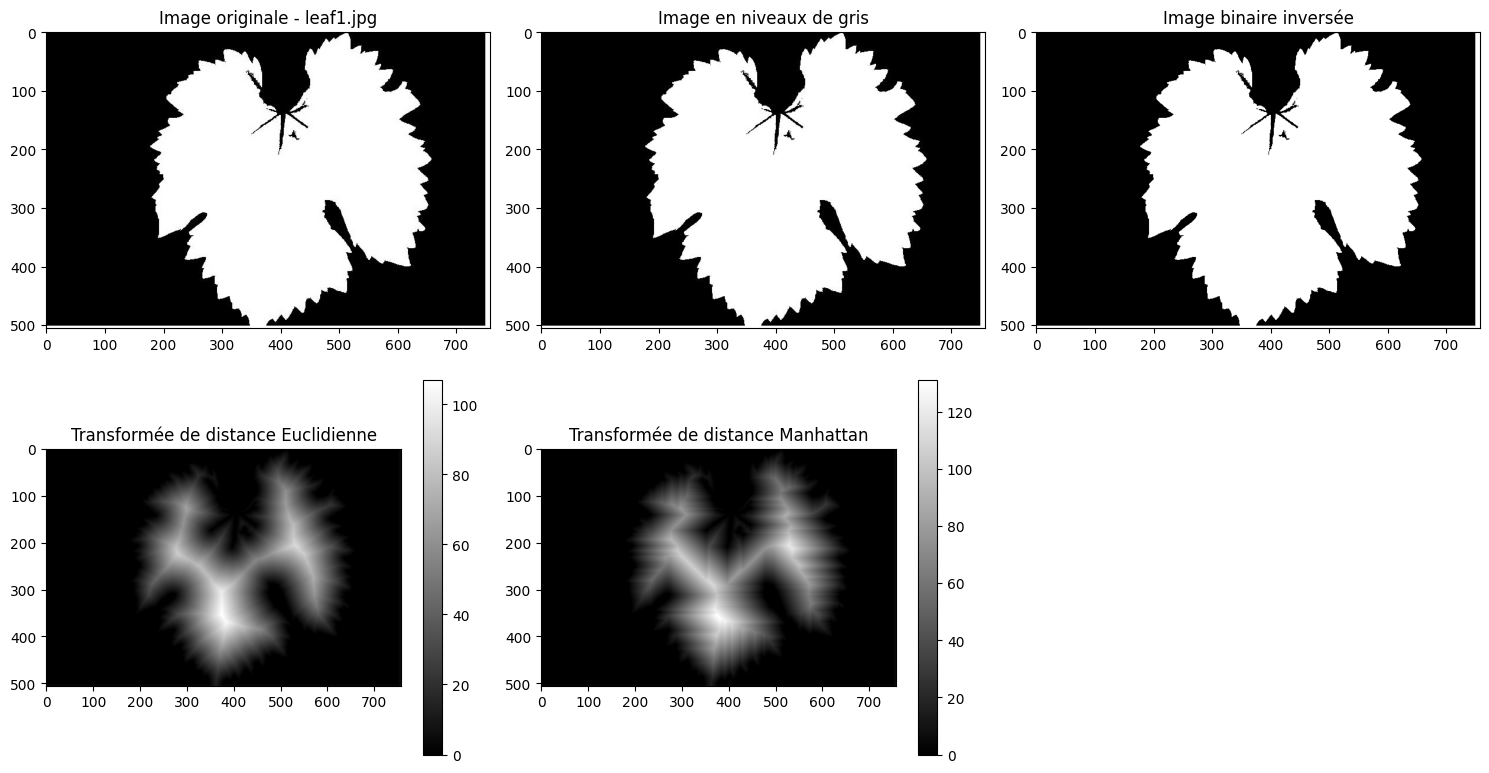

In [ ]:
# Appliquer la fonction aux deux images
process_and_display('melanome.jpg')
process_and_display('leaf1.jpg')



---

# **FAS**

---



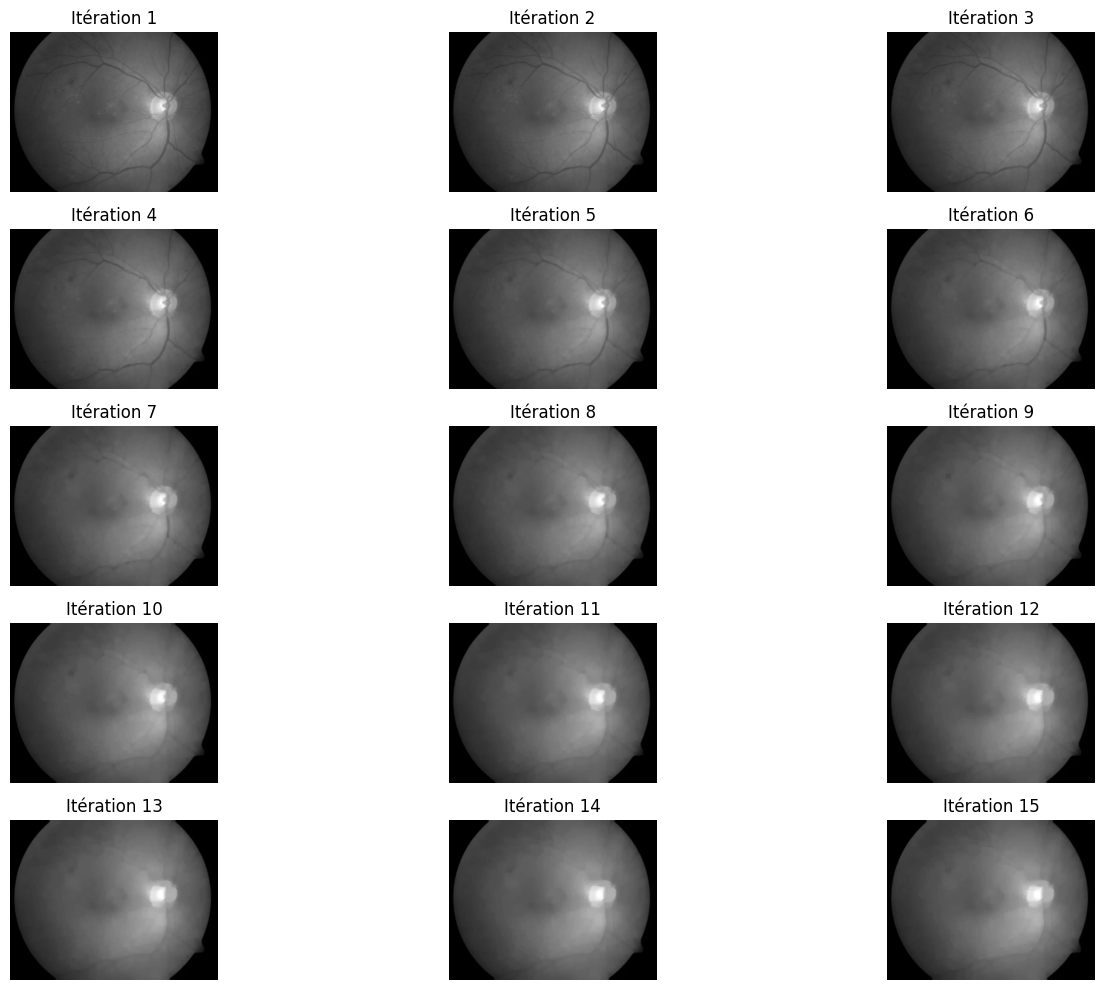

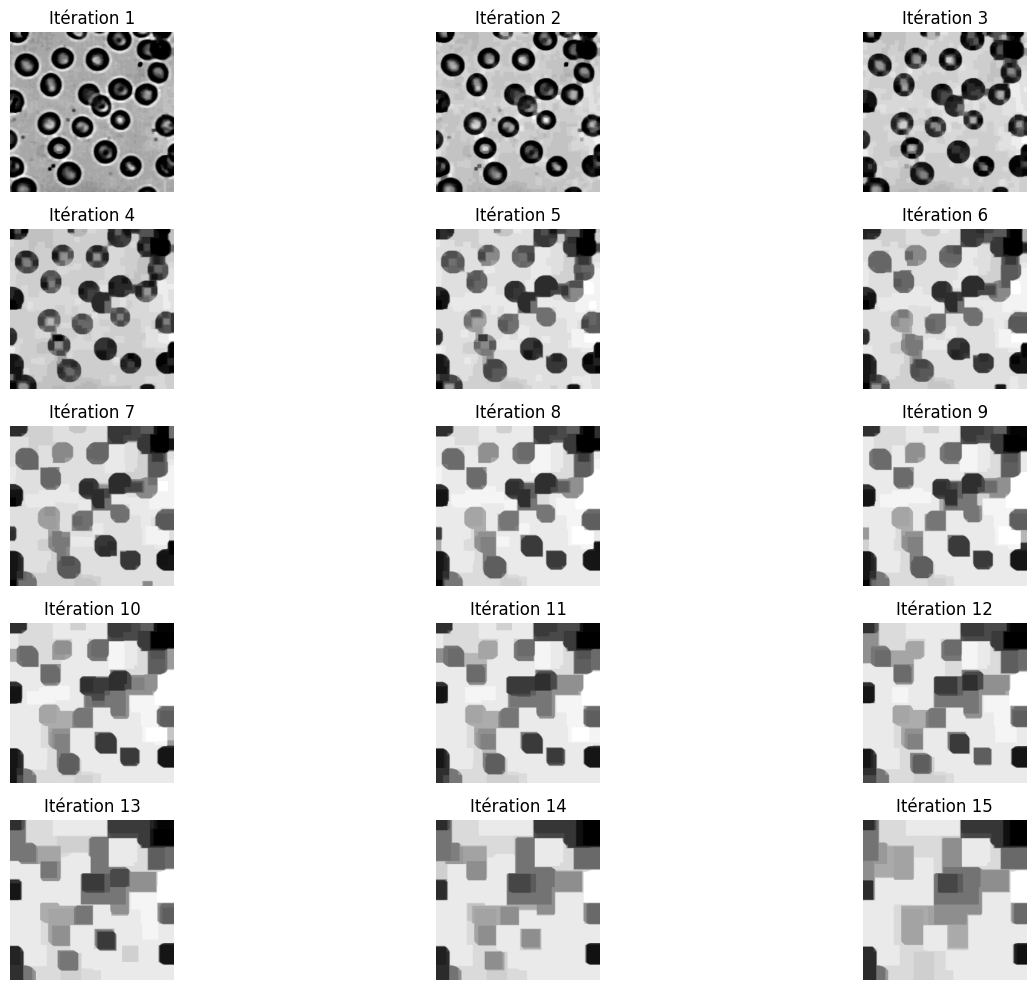

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour le Filtre Alterné Séquentiel avec noyau de taille croissante
def filtre_alterne_sequentiel(image, initial_size=3, iterations=15):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if image is None:
        print("Erreur : l'image n'a pas pu être chargée.")
        return None  # Sortir de la fonction si l'image est None
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialiser l'image
    result = image.copy()

    # Stocker les résultats pour visualisation
    results = []

    for i in range(iterations):
        # Créer l'élément structurant avec une taille croissante
        size = initial_size + i * 2  # Augmentation de la taille
        structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))

        # Appliquer ouverture et fermeture
        opened = cv2.morphologyEx(result, cv2.MORPH_OPEN, structuring_element)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, structuring_element)

        # Mettre à jour le résultat
        result = closed

        # Stocker le résultat pour la visualisation
        results.append(result)

    return results

# Charger les images
image1 = cv2.imread('diaretdb1_image003 - Copie.png')
image2 = cv2.imread('BLOOD1.TIF')

# Vérifier si les images sont chargées correctement
if image1 is None:
    print("Erreur : 'diaretdb1_image003 - Copie.png' n'a pas pu être chargée.")
if image2 is None:
    print("Erreur : 'BLOOD1. TIF' n'a pas pu être chargée.")

# Appliquer le FAS sur les deux images seulement si elles sont chargées
results_image1 = filtre_alterne_sequentiel(image1) if image1 is not None else None
results_image2 = filtre_alterne_sequentiel(image2) if image2 is not None else None

# Visualiser les résultats pour l'image 1
if results_image1 is not None:
    plt.figure(figsize=(15, 10))
    for i, res in enumerate(results_image1):
        plt.subplot(5, 3, i + 1)
        plt.imshow(res, cmap='gray')
        plt.title(f'Itération {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualiser les résultats pour l'image 2
if results_image2 is not None:
    plt.figure(figsize=(15, 10))
    for i, res in enumerate(results_image2):
        plt.subplot(5, 3, i + 1)
        plt.imshow(res, cmap='gray')
        plt.title(f'Itération {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


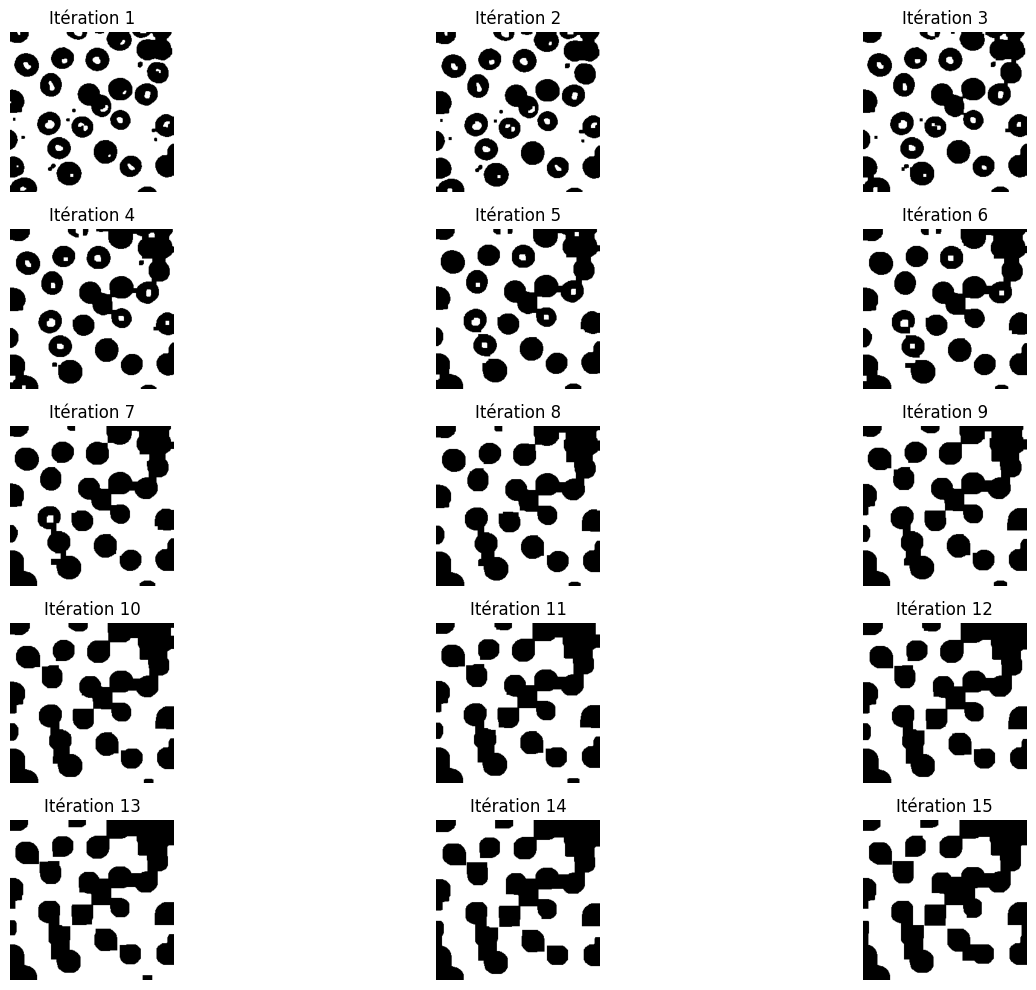

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction de filtre alterné séquentiel avec binarisation
def filtre_alterne_sequentiel(image, initial_size=3, iterations=15, binarization_threshold=127):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Liste pour stocker les résultats binarisés
    results = []

    for i in range(iterations):
        # Taille de l'élément structurant
        size = initial_size + i
        structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))

        # Appliquer l'ouverture et la fermeture
        opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, structuring_element)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, structuring_element)

        # Binariser l'image après l'application du FAS
        _, binarized = cv2.threshold(closed, binarization_threshold, 255, cv2.THRESH_BINARY)

        # Ajouter l'image binarisée à la liste des résultats
        results.append(binarized)

    return results

# Charger l'image 2 (BLOOD1.TIF)
image2 = cv2.imread('BLOOD1.TIF')
if image2 is None:
    raise FileNotFoundError("L'image 'BLOOD1.TIF' n'a pas pu être chargée.")

# Appliquer le FAS et binariser l'image
results_image2 = filtre_alterne_sequentiel(image2)

# Visualiser les résultats pour l'image 2
plt.figure(figsize=(15, 10))
for i, result in enumerate(results_image2):
    plt.subplot(5, 3, i + 1)  # Affichage de 15 images sur 5 lignes et 3 colonnes
    plt.imshow(result, cmap='gray')  # Utiliser la carte de couleurs en niveaux de gris
    plt.title(f'Itération {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


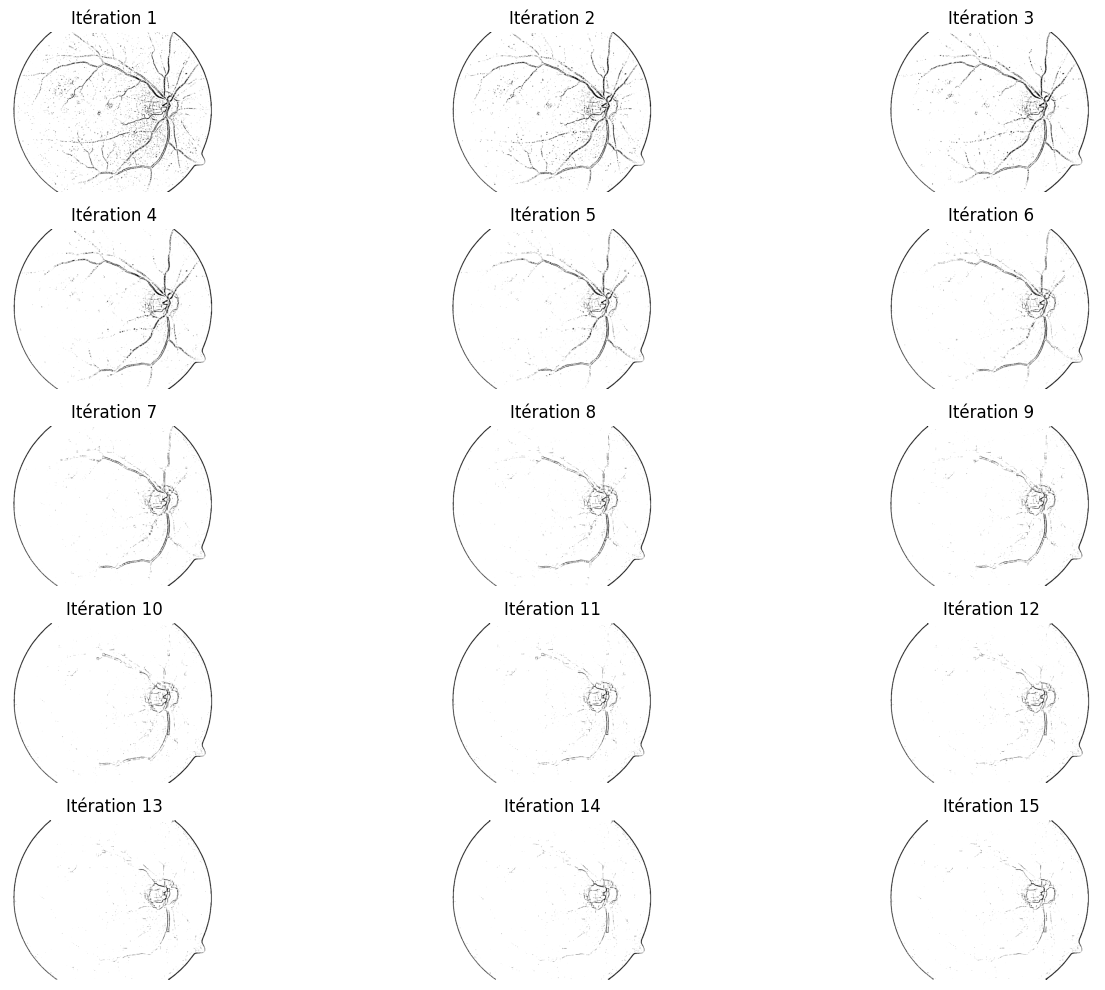

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction de filtre alterné séquentiel avec binarisation adaptative
def filtre_alterne_sequentiel_adaptatif(image, initial_size=3, iterations=15):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Liste pour stocker les résultats binarisés
    results = []

    for i in range(iterations):
        # Taille de l'élément structurant
        size = initial_size + i
        structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))

        # Appliquer l'ouverture et la fermeture
        opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, structuring_element)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, structuring_element)

        # Appliquer le seuillage adaptatif
        binarized = cv2.adaptiveThreshold(closed, 255,
                                          cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY,
                                          11,  # Taille de la fenêtre
                                          2)   # Constante à soustraire

        # Ajouter l'image binarisée à la liste des résultats
        results.append(binarized)

    return results

# Charger l'image rétinienne
image_retinal = cv2.imread('diaretdb1_image003 - Copie.png')
if image_retinal is None:
    raise FileNotFoundError("L'image 'diaretdb1_image003 - Copie.png' n'a pas pu être chargée.")

# Appliquer le FAS avec binarisation adaptative
results_image_retinal = filtre_alterne_sequentiel_adaptatif(image_retinal)

# Visualiser les résultats pour l'image rétinienne
plt.figure(figsize=(15, 10))
for i, result in enumerate(results_image_retinal):
    plt.subplot(5, 3, i + 1)  # Affichage de 15 images sur 5 lignes et 3 colonnes
    plt.imshow(result, cmap='gray')  # Utiliser la carte de couleurs en niveaux de gris
    plt.title(f'Itération {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
